### (c) Igor Sokolov

In [84]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

from scipy.optimize import minimize, root_scalar

import sys
import os

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle
from contextlib import redirect_stdout
from functools import reduce

In [23]:
from logreg_functions import *

### Do a dataset preprocessing

homogeneous

In [212]:
%%bash
python3 generate_data.py --dataset a9a --loss_func log-reg --homogeneous 1

(32561,) [-1.  1. -1. -1.  1.]
Data shape:  (32561, 123)


heterogeneous

In [252]:
%%bash
python3 generate_data.py --dataset a9a --loss_func log-reg --num_workers 100 --homogeneous 0

(32561,) [-1.  1. -1. -1.  1.]
Data shape:  (32561, 123)
worker 0 has 2990 datasamples and 2990 labels
worker 1 has 102 datasamples and 102 labels
worker 2 has 105 datasamples and 105 labels
worker 3 has 108 datasamples and 108 labels
worker 4 has 111 datasamples and 111 labels
worker 5 has 114 datasamples and 114 labels
worker 6 has 117 datasamples and 117 labels
worker 7 has 120 datasamples and 120 labels
worker 8 has 123 datasamples and 123 labels
worker 9 has 126 datasamples and 126 labels
worker 10 has 129 datasamples and 129 labels
worker 11 has 132 datasamples and 132 labels
worker 12 has 135 datasamples and 135 labels
worker 13 has 138 datasamples and 138 labels
worker 14 has 141 datasamples and 141 labels
worker 15 has 144 datasamples and 144 labels
worker 16 has 147 datasamples and 147 labels
worker 17 has 150 datasamples and 150 labels
worker 18 has 153 datasamples and 153 labels
worker 19 has 156 datasamples and 156 labels
worker 20 has 159 datasamples and 159 labels
worker

### Generate the script for local spider

In [254]:
LAUNCH_NUMBERS = 2
launch_number_ar = np.arange (1, LAUNCH_NUMBERS)

project_path = os.getcwd() + "/"
experiment_name_ar = ["local_spider_hetero"]
#experiment_name_ar = ["local_sgd_homo"]

dataset_ar = ["a9a"]

batch_ar = [20, 50]
batch_ar = [20]

num_workers_ar = [20, 50, 100]
num_workers_ar = [20]

num_local_steps_ar = [10, 20, 30, 50, 100]
num_local_steps_ar = [10]

tol = 1e-12
release = True
max_epochs = int(1e5)
max_num_comm = 200
is_continue = 0


shell_script_name = experiment_name_ar[0]+"_"+dataset_ar[0]

with open(shell_script_name + ".sh", 'w') as f:
    with redirect_stdout(f):
        #print ("%%bash")
        print ("#!/bin/bash")

        for launch_number in launch_number_ar:
            for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size ) in \
            enumerate (itertools.product (experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):
                print ("python3 {0}.py --dataset {1} --num_workers {2} --num_local_steps {3} --batch_size {4} --continue {5} --max_epochs {6} --max_num_comm {7}\
                       --launch_number {8} --tol {9}".
                format(experiment_name, dataset, num_workers, num_local_steps, batch_size , is_continue, max_epochs, max_num_comm, launch_number, tol))

                #show the script
f = open(shell_script_name + ".sh", 'r')
print (f.read())
f.close()



#!/bin/bash
python3 local_sgd_homo.py --dataset a9a --num_workers 20 --num_local_steps 10 --batch_size 20 --continue 0 --max_epochs 100000 --max_num_comm 200                       --launch_number 1 --tol 1e-12



### Generate the script for local sgd, local adam and fedadam

In [289]:
LAUNCH_NUMBERS = 2
launch_number_ar = np.arange (1, LAUNCH_NUMBERS)

project_path = os.getcwd() + "/"

experiment_name_ar = ["local_sgd_homo"]
experiment_name_ar = ["local_fed-adam_homo"]
experiment_name_ar = ["local_sgd_hetero"]
experiment_name_ar = ["local_adam_hetero"]
experiment_name_ar = ["local_fed-adam_hetero"]


dataset_ar = ["a9a"]

batch_ar = [20, 50]
batch_ar = [20]

num_workers_ar = [20, 50, 100]
#num_workers_ar = [20]

num_local_steps_ar = [10, 20, 30, 50, 100]
#num_local_steps_ar = [10]

tol = 1e-12
release = True
max_epochs = int(1e10)
max_num_comm = 200
max_it = int(1e10)
is_continue = 0


shell_script_name = experiment_name_ar[0]+"_"+dataset_ar[0]

print (shell_script_name + ".sh")

with open(shell_script_name + ".sh", 'w') as f:
    with redirect_stdout(f):
        #print ("%%bash")
        print ("#!/bin/bash")

        for launch_number in launch_number_ar:
            for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size ) in \
            enumerate (itertools.product (experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):
                print ("python3 {0}.py --dataset {1} --num_workers {2} --num_local_steps {3} --batch_size {4} --continue {5} --max_epochs {6} --max_num_comm {7}\
                --max_it {8} --launch_number {9} --tol {10}".
                format(experiment_name, dataset, num_workers, num_local_steps, batch_size , is_continue, max_epochs, max_num_comm, max_it, launch_number, tol))

                #show the script
f = open(shell_script_name + ".sh", 'r')
print (f.read())
f.close()



local_fed-adam_hetero_a9a.sh
#!/bin/bash
python3 local_fed-adam_hetero.py --dataset a9a --num_workers 20 --num_local_steps 10 --batch_size 20 --continue 0 --max_epochs 10000000000 --max_num_comm 200                --max_it 10000000000 --launch_number 1 --tol 1e-12
python3 local_fed-adam_hetero.py --dataset a9a --num_workers 20 --num_local_steps 20 --batch_size 20 --continue 0 --max_epochs 10000000000 --max_num_comm 200                --max_it 10000000000 --launch_number 1 --tol 1e-12
python3 local_fed-adam_hetero.py --dataset a9a --num_workers 20 --num_local_steps 30 --batch_size 20 --continue 0 --max_epochs 10000000000 --max_num_comm 200                --max_it 10000000000 --launch_number 1 --tol 1e-12
python3 local_fed-adam_hetero.py --dataset a9a --num_workers 20 --num_local_steps 50 --batch_size 20 --continue 0 --max_epochs 10000000000 --max_num_comm 200                --max_it 10000000000 --launch_number 1 --tol 1e-12
python3 local_fed-adam_hetero.py --dataset a9a --num_workers 20

In [189]:
%%bash

bash local_spider.sh

2020-08-20 22:06:11
local_spider_homo_10_20_10
local_spider_homo_10_20_10, global_it: 0, it_comm: 10 , epoch: 0.122, f_grad_norm: 1.6582
local_spider_homo_10_20_10, global_it: 0, it_comm: 20 , epoch: 0.2439, f_grad_norm: 1.6416
local_spider_homo_10_20_10, global_it: 0, it_comm: 30 , epoch: 0.3659, f_grad_norm: 1.6243
local_spider_homo_10_20_10, global_it: 0, it_comm: 40 , epoch: 0.4878, f_grad_norm: 1.6063
local_spider_homo_10_20_10, global_it: 0, it_comm: 50 , epoch: 0.6098, f_grad_norm: 1.5877
local_spider_homo_10_20_10, global_it: 0, it_comm: 60 , epoch: 0.7317, f_grad_norm: 1.5685
local_spider_homo_10_20_10, global_it: 0, it_comm: 70 , epoch: 0.8537, f_grad_norm: 1.5487
local_spider_homo_10_20_10, global_it: 0, it_comm: 80 , epoch: 0.9756, f_grad_norm: 1.5285
local_spider_homo_10_20_10, global_it: 1, it_comm: 90 , epoch: 1.0976, f_grad_norm: 1.5057
local_spider_homo_10_20_10, global_it: 1, it_comm: 100 , epoch: 1.2195, f_grad_norm: 1.4846
local_spider_homo_10_20_10, global_it: 1, i

### plot 

In [152]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

In [297]:
f_grad_norms_ar

{'a9a_local_fed-adam_homo_20_20_10': array([1.65519518, 1.41156062, 1.57094551, 1.42907873, 1.38565759,
        1.31872755, 1.26152224, 1.20619087, 1.15226809, 1.09860922,
        1.05244728, 1.00946908, 0.96819204, 0.93084129, 0.89566165,
        0.86554014, 0.83752127, 0.81079963, 0.78732551, 0.76574392,
        0.74635079, 0.72828809, 0.71112065, 0.6965124 , 0.68495028,
        0.67384247, 0.66357468, 0.65430366, 0.64438105, 0.63639269,
        0.62926892, 0.6217682 , 0.61518336, 0.60904283, 0.60260843,
        0.59692159, 0.59130317, 0.58581463, 0.5805774 , 0.57573868,
        0.57122154, 0.56636355, 0.56200457, 0.55761685, 0.55325654,
        0.54902885, 0.54474175, 0.5405336 , 0.53648603, 0.53210251,
        0.52811283, 0.52416108, 0.52014235, 0.51612391, 0.51232146,
        0.50858565, 0.50491206, 0.5011567 , 0.49748813, 0.49376475,
        0.49015004, 0.48663789, 0.48311997, 0.47949079, 0.47608327,
        0.4727428 , 0.46934064, 0.46600032, 0.46267124, 0.45934968,
        0.45

local_fed-adam_hetero


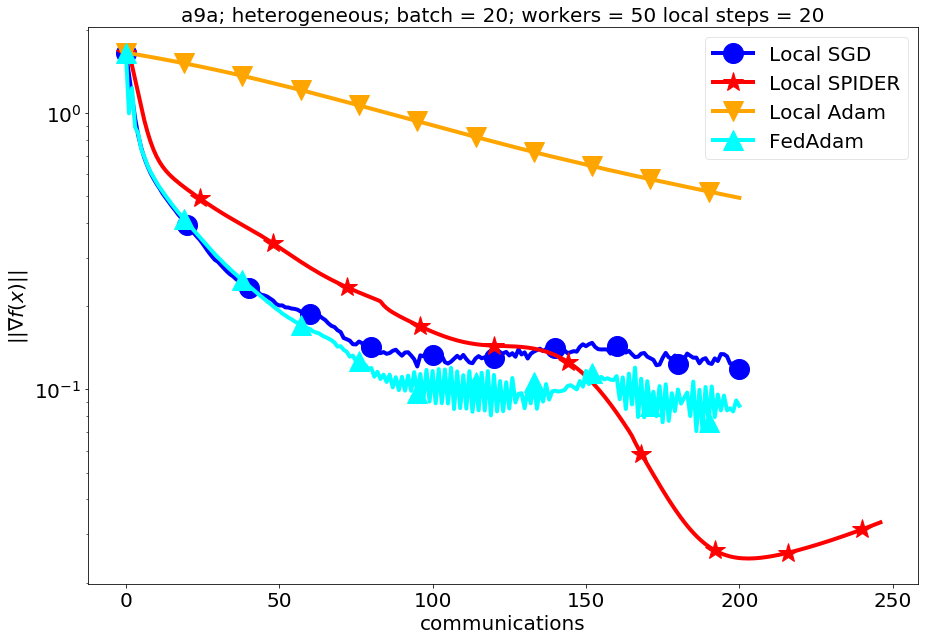

In [331]:
# upload whole data
def export_legend(legend, filename="legend.pdf", expand=[-5, -5, 5, 5]):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)


project_path = os.getcwd() + "/"

experiment_name_ar = ["local_spider_hetero"]
experiment_name_ar = ["local_sgd_homo"]
experiment_name_ar = ["local_adam_homo"]
experiment_name_ar = ["local_fed-adam_homo"]
experiment_name_ar = ["local_sgd_hetero"]

experiment_name_ar = ["local_fed-adam_hetero"]

#experiment_name_ar = ["local_spider_hetero", "local_sgd_homo", "local_adam_homo", "local_fed-adam_homo"]

experiment_name_ar = ["local_sgd_homo", "local_spider_homo", "local_adam_homo", "local_fed-adam_homo"]
experiment_name_ar = ["local_sgd_hetero", "local_spider_hetero", "local_adam_hetero", "local_fed-adam_hetero"]

#experiment_name_ar = ["local_adam_hetero"]

dataset_ar = ["a9a"]
#dataset_ar = ["mushrooms"]

dataset = dataset_ar[0]

loss_func = "log-reg"

batch_ar = [20]
#num_workers_ar = [100]
#num_local_steps_ar = [10]

LAUNCH_NUMBERS = 2
launch_number_ar = np.arange(1, LAUNCH_NUMBERS)
num_workers_ar = [20, 50, 100]

num_workers_ar = [50]

num_local_steps_ar = [20, 30, 50, 100]

num_local_steps_ar = [20]


tol = 1e-12
release = True
max_it = 100
is_continue = 0

w_init = {}
la_ar = {}
info_num_ar = {}
loss_ar = {}
epochs_ar = {}
its_comm_ar = {}
f_grad_norms_ar = {}
label_ar = {}

experiment_name = experiment_name_ar[0]

experiments = []
for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
        enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):
    
    """
    if experiment_name in experiments:
        continue
    else:
        experiments.append(experiment_name)
    """
    
    if experiment not in experiments:
        experiments.append(experiment_name)
        
    experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

    id_label = experiment
    #label = id_label
    if experiment_name == 'local_fed-adam_homo' or experiment_name=="local_fed-adam_hetero":
        name = "FedAdam"
    
    if experiment_name == 'local_sgd_homo' or experiment_name=="local_sgd_hetero":
        name = "Local SGD"
    
    if experiment_name == 'local_spider_homo' or experiment_name=="local_spider_hetero":
        name = name = "Local SPIDER"
    
    if experiment_name == 'local_adam_homo' or experiment_name=="local_adam_hetero":
        name = "Local Adam"
        
    
    
   #label = '{0}_b{1}_nw{2}_nls{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)
    label = '{0}'.format(name)
    
    id_str = "{0}_{1}".format(dataset, experiment)  #####
    id_func = "{0}_{1}".format(dataset, loss_func)  #####
    id_dataset = "{0}".format(dataset)  #####

    logs_path = project_path + "logs1_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}/".format(dataset)
    plot_path = project_path + "plot_{0}/".format(dataset)

    if os.path.exists(plot_path) == False:
        os.mkdir(plot_path)

    if os.path.isfile(data_path + 'data_info.npy'):
        data_info = np.load(data_path + 'data_info.npy')
        L = data_info[0]
    else:
        raise ValueError(experiment + " cannot load data_info.npy")

    if os.path.isfile(logs_path + 'norms' + "_" + experiment + ".npy"):
        f_grad_norms_ar[id_str] = np.load(logs_path + 'norms' + '_' + experiment + ".npy")
    else:
        raise ValueError(experiment + " cannot load norms info")

    if os.path.isfile(logs_path + 'communication' + "_" + experiment + ".npy"):
        its_comm_ar[id_str] = np.load(logs_path + 'communication' + '_' + experiment + ".npy")
    else:
        raise ValueError(experiment + " cannot load communication info")

    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        # print(id_str, loss_ar[id_str].shape)
    else:
        #print(id_str)
        raise ValueError(experiment + " cannot load loss info")

    if os.path.isfile(logs_path + 'epochs' + "_" + experiment + ".npy"):
        epochs_ar[id_str] = np.load(logs_path + 'epochs' + '_' + experiment + ".npy")
    else:
        raise ValueError(experiment + " cannot load epochs info")

    # print (label)
    label_ar[id_label] = label

keys = list(label_ar.keys())
# print (len(keys))

values_all_posible = ["o", "*", "v", "^", "<", ">", "s", "p", "P", "h", "H", "+", "x", "X", "D", "d", "|", "_"]

len_batch_ar = len(batch_ar)
n_experiments_per_plot = int(len(experiments) / len_batch_ar)

values = values_all_posible[:n_experiments_per_plot]
values = reduce(lambda x, y: x + y, [[values[i]] * len_batch_ar for i in range(len(values))])

marker_ar = dict(zip(keys, values))

colors_all_posible = ['blue', 'red', 'orange', 'aqua', 'violet', 'darkorange',
                      'cornflowerblue', 'darkgreen',
                      'coral', 'lime',
                      'darkgreen', 'goldenrod', 'maroon',
                      'black', 'brown', 'yellowgreen'
                      ]

colors = colors_all_posible[:n_experiments_per_plot]
colors = reduce(lambda x, y: x + y, [[colors[i]] * len_batch_ar for i in range(len(colors))])

color_ar = dict(zip(keys, colors))

# what dow you want to show in the plot

colors = ['blue', 'red', 'orange', 'aqua', 'violet', 'darkorange',
          'cornflowerblue', 'darkgreen',
          'coral', 'lime',
          'darkgreen', 'goldenrod', 'maroon',
          'black', 'brown', 'yellowgreen'
          ]

tol = 1e-8
x_axis = "iter"
y_axis = "norm"

n_iter_ar = {}
n_iter_time_ar = {}  # here I store x_axis for time = time in sec
for j, batch in enumerate(batch_ar):
    n_iter = []
    for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
            enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):

        experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

        id_label = experiment
        id_str = "{0}_{1}".format(dataset, experiment)
        label = '{0}_b{1}_nw{2}_nls{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)
        n_iter.append(its_comm_ar[id_str].shape[0])

    #n_iter_ar[batch] = int(1.2 * min(n_iter))

experiments = []
fig = plt.figure()

####################################################################################################################################################################################
legend_data = []
line_labels = []
marker_size = 20

for j, batch in enumerate(batch_ar):
    for i, (experiment_name, dataset, num_workers, num_local_steps, batch_size) in \
            enumerate(itertools.product(experiment_name_ar, dataset_ar, num_workers_ar, num_local_steps_ar, batch_ar)):

        # print (experiment_name, dataset, loss_func, sampling_kind, step_type, batch)
        """
        if experiment_name in experiments:
            continue
        else:
            experiments.append(experiment_name)
        """
        
        if experiment not in experiments:
            experiments.append(experiment_name)
        
        experiment = '{0}_{1}_{2}_{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

        id_label = experiment
        label = '{0}_b{1}_nw{2}_nls{3}'.format(experiment_name, batch_size, num_workers, num_local_steps)

        id_str = "{0}_{1}".format(dataset, experiment)  #####
        id_func = "{0}_{1}".format(dataset, loss_func)  #####
        id_dataset = "{0}".format(dataset)  #####

        logs_path = project_path + "logs1_{0}_{1}/".format(dataset, experiment)
        data_path = project_path + "data_{0}/".format(dataset)

        if x_axis == "epochs":
            plt.xlabel('epochs')
            if ((id_str in epochs_ar) and id_str in loss_ar):
                markers_on = its_comm_ar[id_str][its_comm_ar[id_str] % 20000 == 0]
                if y_axis == "loss":
                    plt.ylabel(y_axis)
                    plt.plot(epochs_ar[id_str], loss_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                         markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])
                elif y_axis == "norm":
                    plt.ylabel(y_axis)
                    plt.plot(epochs_ar[id_str], f_grad_norms_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                         markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])
                raise ValueError("can not plot")
            else:
                raise ValueError("can not plot")
        elif x_axis == "iter":
            plt.xlabel('communications')
            if ((id_str in its_comm_ar) and id_str in loss_ar):

                markers_on = its_comm_ar[id_str][its_comm_ar[id_str] % (int(len(its_comm_ar[id_str][:-(1 + 2 * i)]) / 10)) == 0]
                if y_axis == "loss":
                    plt.ylabel(r"$f(x)$")
                    legend_data.append(
                        plt.plot(its_comm_ar[id_str], loss_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                                 markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])[0])
                    line_labels.append(label_ar[id_label])
                elif y_axis == "norm":
                    plt.ylabel(r"$\|| \nabla f(x) \||$")

                    legend_data.append(
                            plt.plot(its_comm_ar[id_str], f_grad_norms_ar[id_str], color=color_ar[id_label], marker=marker_ar[id_label],
                                     markersize=marker_size, markevery=list(markers_on), label=label_ar[id_label])[0])
                    line_labels.append(label_ar[id_label])
                else:
                    raise ValueError("can not plot")
            else:
                raise ValueError("can not plot")

    plt.rcParams["figure.figsize"] = [26, 20]
    #plt.rcParams["figure.figsize"] = [26, 20]

    size = 20
    title = r"${0}$".format(loss_func)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'FreeSerif'
    plt.rcParams['lines.linewidth'] = 4
    # plt.rcParams['lines.markersize'] = 10
    plt.rcParams['xtick.labelsize'] = size  # 40
    plt.rcParams['ytick.labelsize'] = size  # 40
    plt.rcParams['legend.fontsize'] = size  # 30

    plt.rcParams['axes.titlesize'] = size  # 40
    plt.rcParams['axes.labelsize'] = size  # 40
    plt.rcParams["figure.figsize"] = [13,9]
    plt.yscale('log')
    # plt.xscale('log')
    print (experiment_name)
    if experiment_name[-4:] == 'homo':
        plt.title("{0}; {1}; batch = {2}; workers = {3}; local steps = {4}".format(dataset, "homogeneus", batch, num_workers, num_local_steps))
    
    if experiment_name[-6:] == 'hetero':
        plt.title("{0}; {1}; batch = {2}; workers = {3}; local steps = {4}".format(dataset, "heterogeneous", batch, num_workers, num_local_steps))
    
    #plt.ticklabel_format(axis='y', style='sci', scilimits=(1, 4))
    #plt.ticklabel_format(axis='x', style='sci', scilimits=(1, 4))
    #

    plt.tight_layout()
    plot_path = project_path + "plot_{0}/".format(dataset)
    
    legend = plt.legend(loc="lower left", framealpha=0.5)
    legend = plt.legend(loc="upper right", framealpha=0.5)
    
    #legend = plt.legend(loc="lower center", framealpha=0.5, ncol=3, bbox_to_anchor=(0.45, -1.2))
    plt.savefig(plot_path + "{0}_{1}_{2}_{3}_{4}_{5}_{6}.pdf".format('-'.join(experiment_name_ar), '-'.join(list(map(str,batch_ar))),
                                                         '-'.join(list(map(str,num_workers_ar))), '-'.join(list(map(str,num_local_steps_ar))),
                                                                 x_axis, y_axis, loss_func))
    plt.show()
    # plt.savefig(plot_path + "{0}_{1}_{2}_{3}.pdf".format('-'.join(experiment_name_ar), x_axis, loss_func, batch))
    #export_legend(legend)

# plt.savefig(plot_path + "{0}_{1}_{2}.pdf".format('-'.join(experiment_name_ar), x_axis, loss_func))


# plt.plot()

'local_fed-adam_homo'

In [159]:
# <experiment_name>_b<batch_size>_nw<num_workers>_nls<num_local_steps> 

In [168]:
f_grad_norms_ar.keys()

dict_keys(['mushrooms_local_spider_homo_10_20_10', 'mushrooms_local_spider_homo_10_20_20', 'mushrooms_local_spider_homo_10_20_30', 'mushrooms_local_spider_homo_10_20_50', 'mushrooms_local_spider_homo_10_20_100'])